<a href="https://colab.research.google.com/github/ongfong/data_analysis_projects/blob/main/candlestick_stock_aapl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as fplt

In [4]:
df = pd.read_csv('/content/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'],format='%Y/%m/%d')

In [7]:
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [32]:
df = df.rename(columns={'Name':'Tick'})
df

,date,open,high,low,close,volume,Tick
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [11]:
null = df.isnull().sum()
print(null)

date       0
open      11
high       8
low        8
close      0
volume     0
Tick       0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
null = df.isnull().sum()
print(null)

date      0
open      0
high      0
low       0
close     0
volume    0
Tick      0
dtype: int64


In [27]:
aapl = df.loc[df['Tick'] == 'AAPL']
aapl.head()

,date,open,high,low,close,volume,Tick
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [33]:
mask = (aapl['date'] > '2018-01-01') & (aapl['date'] <= '2018-12-31')
aapl_2018 = aapl.loc[mask]
aapl_2018

,date,open,high,low,close,volume,Tick
2492,2018-01-02,170.160,172.3000,169.2600,172.26,25555934,AAPL
2493,2018-01-03,172.530,174.5500,171.9600,172.23,29517899,AAPL
2494,2018-01-04,172.540,173.4700,172.0800,173.03,22434597,AAPL
2495,2018-01-05,173.440,175.3700,173.0500,175.00,23660018,AAPL
2496,2018-01-08,174.350,175.6100,173.9300,174.35,20567766,AAPL
2497,2018-01-09,174.550,175.0600,173.4100,174.33,21583997,AAPL
2498,2018-01-10,173.160,174.3000,173.0000,174.29,23959895,AAPL
2499,2018-01-11,174.590,175.4886,174.4900,175.28,18667729,AAPL
2500,2018-01-12,176.180,177.3600,175.6500,177.09,25418080,AAPL
2501,2018-01-16,177.900,179.3900,176.1400,176.19,29565947,AAPL


In [35]:
aapl_2018.set_index(aapl_2018['date'],inplace=True)

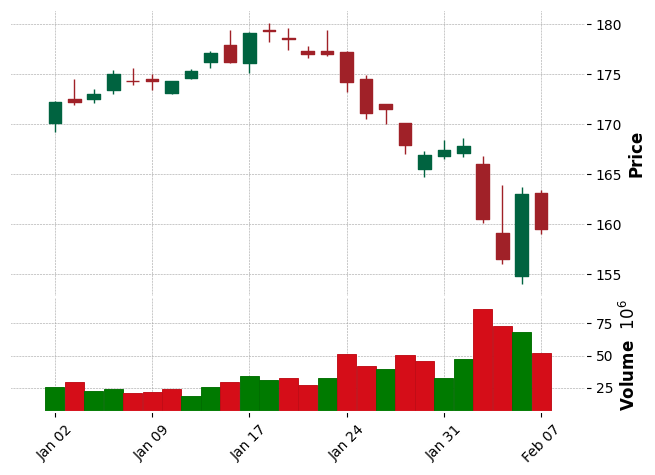

In [36]:
fplt.plot(
    aapl_2018,
    type='candle',
    style='charles',
    volume = True
)